In [41]:
from mysql.connector import connect, Error
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


def connect_to_db() -> connect:
    """
    Connect to the database.
    """
    # BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    with open("password.txt", "r") as f:
        password = f.read()
    try:
        db = connect(
            host="35.199.127.241",
            user="looqbox-challenge",
            password=password,
            database="looqbox_challenge",
        )
    except Error as e:
        print(e)
        # exit(1)
    return db

In [39]:
def case_2(query: str, filter: list[str] = None) -> pd.DataFrame:
    """
    Case 2 of the challenge.

    Parameters:
        query: str
            Query to be executed.
        filter: list[str]
            List of filters.

    Returns:
        pd.DataFrame
            Dataframe with the data.
    """
    db: connect = connect_to_db()
    with db.cursor() as cursor:
        cursor.execute(query)
        results: list = cursor.fetchall()
        df = pd.DataFrame(results)
        # Name of the columns
        header: list = [tup[0] for tup in cursor.description]
        df.columns = header
    # print(df)
    return df

In [114]:
query_1 = """
    SELECT
        STORE_CODE,
        STORE_NAME,
        START_DATE,
        END_DATE,
        BUSINESS_NAME,
        BUSINESS_CODE
    FROM data_store_cad
    """
query_2 = """
    SELECT
        STORE_CODE,
        DATE,
        SALES_VALUE,
        SALES_QTY
        FROM data_store_sales
    WHERE DATE BETWEEN '2019-01-01' AND '2019-12-31'
    """
df1: pd.DataFrame = case_2(query_1)
df2: pd.DataFrame = case_2(query_2)

In [124]:
# df1["START_DATE"] = df1["START_DATE"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())
# d1 = datetime.strptime('2019-01-01', format).date()
# d2 = datetime.strptime('2019-12-31', format).date()
# df1 = df1[df1['START_DATE'] > d1]
# print(df1.head())
print(df1.columns)
# format = '%Y-%m-%d'
# print(df2.head())
print(df2.columns)
d: dict = {store_name : store_code for store_code, store_name in zip(df1["STORE_CODE"], df1["STORE_NAME"])}
d2: dict = {store_name : store_business for store_name, store_business in zip(df1["STORE_NAME"], df1["BUSINESS_NAME"])}
store_amount: dict = {store_name : df2["SALES_VALUE"].loc[df2["STORE_CODE"] == d[store_name]].sum()/df2["SALES_QTY"].loc[df2["STORE_CODE"] == d[store_name]].sum() for store_name in d.keys()}
df3: pd.DataFrame = pd.DataFrame()
df3["Loja"] = df1["STORE_NAME"]
df3["Categoria"] = [d2[store_name] for store_name in df3["Loja"]]
df3["TM"] = [f"{store_amount[store_name]:.2f}" for store_name in df3["Loja"]]
df3 = df3.sort_values(by = ["Loja"])
print(df3)


Index(['STORE_CODE', 'STORE_NAME', 'START_DATE', 'END_DATE', 'BUSINESS_NAME',
       'BUSINESS_CODE'],
      dtype='object')
Index(['STORE_CODE', 'DATE', 'SALES_VALUE', 'SALES_QTY'], dtype='object')
              Loja    Categoria     TM
13           Bahia      Atacado  15.39
17         Bangkok        Posto  13.67
7            Belem  Proximidade  15.37
5           Berlin  Proximidade  15.39
14    Buenos Aires      Atacado  15.39
1          Chicago       Varejo  15.53
12           Dubai      Atacado  15.39
9        Hong Kong        Farma  26.33
8           London        Farma  28.96
11           Madri        Farma  29.00
18           Miami        Posto  13.67
6         New York  Proximidade  15.39
4            Paris  Proximidade  15.39
10  Rio de Janeiro        Farma  29.56
2             Roma       Varejo  15.39
15        Salvador      Atacado  15.39
0        Sao Paulo       Varejo  15.39
16          Sidney        Posto  13.67
3            Tokio       Varejo  15.39
19       Vancouver   

In [97]:
print(sum([len(df2["STORE_CODE"].loc[df2["STORE_CODE"] == i]) for i in range(1, 21)]))
print(len(sorted(df2["STORE_CODE"].unique())) == 20)

7300
True


In [2]:
def do_query(db: connect, query: str) -> pd.DataFrame:
    """
    Execute the query.

    Parameters:
        db: connect
            Database connection.
        query: str
            Query to be executed.

    Returns:
        pd.DataFrame
            Dataframe with the data.
    """
    with db.cursor() as cursor:
        cursor.execute(query)
        results: list = cursor.fetchall()
        df = pd.DataFrame(results)
        # Name of the columns
        header: list = [tup[0] for tup in cursor.description]
        df.columns = header
    return df

In [3]:
db: connect = connect_to_db()
query = """
SELECT Genre, Year, RevenueMillions FROM IMDB_movies;
"""
df: pd.DataFrame = do_query(db, query)
db.close()
print(df)

                        Genre  Year RevenueMillions
0     Action,Adventure,Sci-Fi  2014             333
1    Adventure,Mystery,Sci-Fi  2012             126
2             Horror,Thriller  2016             138
3     Animation,Comedy,Family  2016             270
4    Action,Adventure,Fantasy  2016             325
..                        ...   ...             ...
995       Crime,Drama,Mystery  2015            None
996                    Horror  2007              18
997       Drama,Music,Romance  2008              58
998          Adventure,Comedy  2014            None
999     Comedy,Family,Fantasy  2016              20

[1000 rows x 3 columns]


In [45]:
# Gênero 1: Action, Fantasy, Sci-Fi
df2 = df["Genre"].value_counts().iloc[:10]
print(df2.index)
print(df2)
# print(df["Genre"].value_counts())
print(df["Year"].max())


Index(['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Drama,Romance', 'Comedy',
       'Drama,Romance', 'Comedy,Drama', 'Animation,Adventure,Comedy',
       'Action,Adventure,Fantasy', 'Comedy,Romance', 'Crime,Drama,Thriller'],
      dtype='object')
Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64
2016


In [54]:
years: list[int] = df["Year"].unique()
index = ['Action,Adventure,Sci-Fi', 'Comedy,Drama,Romance',
        'Animation,Adventure,Comedy', 'Action,Adventure,Fantasy',
        'Crime,Drama,Thriller']
years.sort()
print(years)

fig = plt.figure(dpi = 150)
plt.plot(a, df["Year"].value_counts())
plt.xlabel("Ano")
plt.ylabel("Número de filmes")
plt.show()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [59]:
print(df.query("Genre == 'Action,Adventure,Sci-Fi' & Year == 2016").sum())

Genre              Action,Adventure,Sci-FiAction,Adventure,Sci-Fi...
Year                                                           14112
RevenueMillions                                                 1722
dtype: object


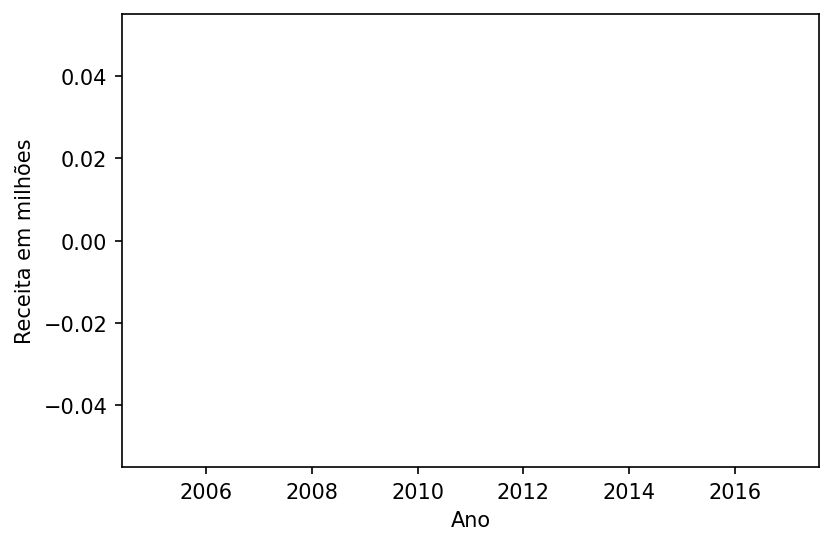

In [68]:
years: list[int] = df["Year"].unique()
index = ['Action,Adventure,Sci-Fi', 'Comedy,Drama,Romance',
        'Animation,Adventure,Comedy', 'Action,Adventure,Fantasy',
        'Crime,Drama,Thriller']
years.sort()
colors = ['blue', 'red', 'green', 'pink', 'orange']
fig = plt.figure(dpi = 150)
for genre, color in zip(index, colors):
    for year in years:
        bin = [year - 1, year + 1]
        y = df.query(f"Genre == '{genre}' & Year == {year}")["RevenueMillions"].sum()
        plt.hist(y, bins = bin, color = color, label = f"{year}")
plt.xlabel("Ano")
plt.ylabel("Receita em milhões")
# plt.ylim(0, 100)
plt.show()

